In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import matplotlib.transforms as mtransforms
from scipy.optimize import curve_fit

plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Functions for data loading

In [2]:
def load_QIS_data(dir, x="chi"):
    x_list = []
    runtime_mean_list = []
    runtime_std_list = []
    runtime_lower_std_list = []
    runtime_upper_std_list = []
    runtime_median_list = []
    runtime_lower_quantile_list = []
    runtime_upper_quantile_list = []
    runtime_min_list = []
    runtime_max_list = []

    for file_name in sorted(os.listdir(dir)):
        # Check if the file is a JSON file
        if file_name.endswith("json"):
            # Extract n and chi from the file name
            n = int(file_name.split('_')[1])
            chi = int(file_name.split('_')[2])
            if x == "chi":
                x_list.append(chi)
            elif x == "n":
                x_list.append(n)
            else:
                raise ValueError("x must be either 'chi' or 'n'")

            # Load the JSON file
            timings = json.load(open(f"{dir}/{file_name}"))

            # Extract the runtime values from the JSON data
            runtime = []
            for key, el in timings.items():
                runtime.append(el)
            
            # Calculate statistics
            runtime_mean = np.mean(runtime)
            runtime_std = np.std(runtime)
            runtime_median = np.median(runtime)
            runtime_lower_quantile = np.quantile(runtime, 0.25)
            runtime_upper_quantile = np.quantile(runtime, 0.75)
            runtime_min = np.min(runtime)
            runtime_max = np.max(runtime)
            
            # Append the statistics to the lists
            runtime_mean_list.append(runtime_mean)
            runtime_std_list.append(runtime_std)
            runtime_median_list.append(runtime_median)
            runtime_lower_quantile_list.append(runtime_lower_quantile)
            runtime_upper_quantile_list.append(runtime_upper_quantile)
            runtime_min_list.append(runtime_min)
            runtime_max_list.append(runtime_max)
            runtime_lower_std_list.append(runtime_mean-runtime_std)
            runtime_upper_std_list.append(runtime_mean+runtime_std)
    
    # sort data
    runtime_mean_list = [y for _, y in sorted(zip(x_list, runtime_mean_list))]
    runtime_std_list = [y for _, y in sorted(zip(x_list, runtime_std_list))]
    runtime_median_list = [y for _, y in sorted(zip(x_list, runtime_median_list))]
    runtime_lower_quantile_list = [y for _, y in sorted(zip(x_list, runtime_lower_quantile_list))]
    runtime_upper_quantile_list = [y for _, y in sorted(zip(x_list, runtime_upper_quantile_list))]
    runtime_min_list = [y for _, y in sorted(zip(x_list, runtime_min_list))]
    runtime_max_list = [y for _, y in sorted(zip(x_list, runtime_max_list))]
    runtime_lower_std_list = [y for _, y in sorted(zip(x_list, runtime_lower_std_list))]
    runtime_upper_std_list = [y for _, y in sorted(zip(x_list, runtime_upper_std_list))]
    x_list = sorted(x_list)
    
    return x_list, runtime_mean_list, runtime_std_list, runtime_lower_std_list, runtime_upper_std_list, runtime_median_list, runtime_lower_quantile_list, runtime_upper_quantile_list, runtime_min_list, runtime_max_list

In [3]:
def load_DNS_data(dir):
    n_list = []
    runtime_mean_list = []
    runtime_std_list = []
    runtime_lower_std_list = []
    runtime_upper_std_list = []
    runtime_median_list = []
    runtime_lower_quantile_list = []
    runtime_upper_quantile_list = []
    runtime_min_list = []
    runtime_max_list = []

    for file_name in sorted(os.listdir(dir)):
        if file_name.endswith("json"):
            n = int(file_name.split('_')[1])
            timings = json.load(open(f"{dir}/{file_name}"))

            runtime = []

            for i, (key, el) in enumerate(timings.items()):
                runtime.append(el)
            
            runtime_mean = np.mean(runtime)
            runtime_std = np.std(runtime)
            runtime_median = np.median(runtime)
            runtime_lower_quantile = np.quantile(runtime, 0.25)
            runtime_upper_quantile = np.quantile(runtime, 0.75)
            runtime_min = np.min(runtime)
            runtime_max = np.max(runtime)

            # print(chi, min(runtime), max(runtime), runtime_lower_quantile)

            n_list.append(n)
            runtime_mean_list.append(runtime_mean)
            runtime_std_list.append(runtime_std)
            runtime_median_list.append(runtime_median)
            runtime_lower_quantile_list.append(runtime_lower_quantile)
            runtime_upper_quantile_list.append(runtime_upper_quantile)
            runtime_min_list.append(runtime_min)
            runtime_max_list.append(runtime_max)
            runtime_lower_std_list.append(runtime_mean-runtime_std)
            runtime_upper_std_list.append(runtime_mean+runtime_std)
    
    # sort data
    runtime_mean_list = [y for _, y in sorted(zip(n_list, runtime_mean_list))]
    runtime_std_list = [y for _, y in sorted(zip(n_list, runtime_std_list))]
    runtime_median_list = [y for _, y in sorted(zip(n_list, runtime_median_list))]
    runtime_lower_quantile_list = [y for _, y in sorted(zip(n_list, runtime_lower_quantile_list))]
    runtime_upper_quantile_list = [y for _, y in sorted(zip(n_list, runtime_upper_quantile_list))]
    runtime_min_list = [y for _, y in sorted(zip(n_list, runtime_min_list))]
    runtime_max_list = [y for _, y in sorted(zip(n_list, runtime_max_list))]
    runtime_lower_std_list = [y for _, y in sorted(zip(n_list, runtime_lower_std_list))]
    runtime_upper_std_list = [y for _, y in sorted(zip(n_list, runtime_upper_std_list))]
    n_list = sorted(n_list)
    
    return n_list, runtime_mean_list, runtime_std_list, runtime_lower_std_list, runtime_upper_std_list, runtime_median_list, runtime_lower_quantile_list, runtime_upper_quantile_list, runtime_min_list, runtime_max_list

# GPU Runtime vs. chi and n (Fig. 7 in the paper)

In [4]:
# QIS chi sweep on GPU
data_QIS_chi_sweep_GPU = load_QIS_data("data/QIS_chi_sweep_GPU", x="chi")
chi_list_QIS_GPU = data_QIS_chi_sweep_GPU[0]
runtime_QIS_chi_GPU = data_QIS_chi_sweep_GPU[1]
fill_lower_QIS_chi_GPU = data_QIS_chi_sweep_GPU[3]
fill_higher_QIS_chi_GPU = data_QIS_chi_sweep_GPU[4]

In [5]:
# QIS n sweep on GPU
data_QIS_n_sweep_GPU = load_QIS_data("data/QIS_n_sweep_GPU", x="n")
n_list_QIS_GPU = data_QIS_n_sweep_GPU[0]
runtime_QIS_n_GPU = data_QIS_n_sweep_GPU[1]
fill_lower_QIS_n_GPU = data_QIS_n_sweep_GPU[3]
fill_higher_QIS_n_GPU = data_QIS_n_sweep_GPU[4]

In [6]:
# DNS n sweep on GPU
data_DNS_n_sweep_GPU = load_DNS_data("data/DNS_GPU")
n_list_DNS_GPU = data_DNS_n_sweep_GPU[0]
runtime_DNS_n_GPU = data_DNS_n_sweep_GPU[1]
fill_lower_DNS_n_GPU = data_DNS_n_sweep_GPU[3]
fill_higher_DNS_n_GPU = data_DNS_n_sweep_GPU[4]

In [7]:
# fitting functions
def linear(x, A, B):
    x = np.array(x)
    y = A + x*B
    return y

def poly(x, A, B, C):
    x = np.array(x)
    y = A+B*x**C
    return y

def exponential(x, A, B):
    x = np.array(x)
    y = A*np.exp(B*x)
    return y

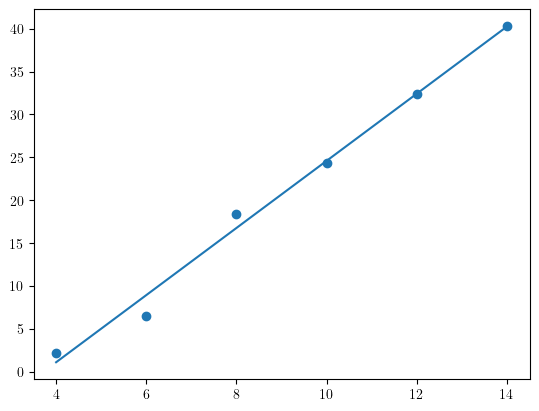

In [8]:
params, cov = curve_fit(linear, n_list_QIS_GPU, runtime_QIS_n_GPU)
A_n_QIS = params[0]
B_n_QIS = params[1]
std_B_n_QIS = np.sqrt(np.diag(cov))[1]
plt.scatter(n_list_QIS_GPU, runtime_QIS_n_GPU)
plt.plot(n_list_QIS_GPU, linear(n_list_QIS_GPU, A_n_QIS, B_n_QIS))

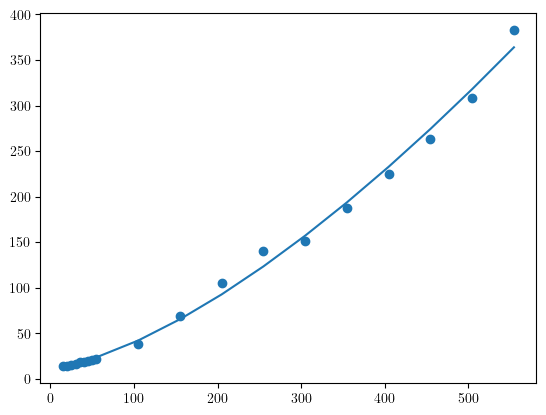

In [9]:
params, cov = curve_fit(poly, chi_list_QIS_GPU, runtime_QIS_chi_GPU)
A_chi_QIS = params[0]
B_chi_QIS = params[1]
C_chi_QIS = params[2]
std_C_chi_QIS = np.sqrt(np.diag(cov))[2]

plt.scatter(chi_list_QIS_GPU, runtime_QIS_chi_GPU)
plt.plot(chi_list_QIS_GPU, poly(chi_list_QIS_GPU, A_chi_QIS, B_chi_QIS, C_chi_QIS))

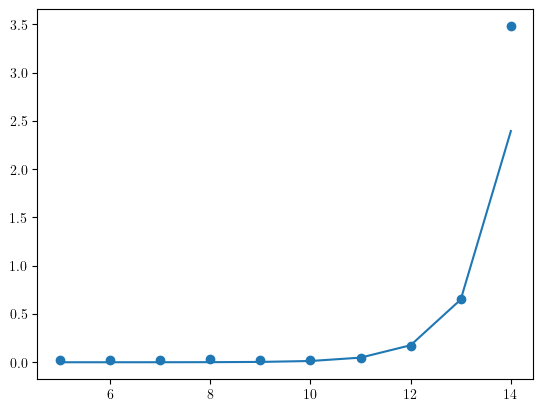

In [10]:
params, cov = curve_fit(exponential, n_list_DNS_GPU[:-1], runtime_DNS_n_GPU[:-1])
A_n_DNS = params[0]
B_n_DNS = params[1]
std_B_n_DNS = np.sqrt(np.diag(cov))[1]

plt.scatter(n_list_DNS_GPU, runtime_DNS_n_GPU)
# plt.yscale('log')
plt.plot(n_list_DNS_GPU, exponential(n_list_DNS_GPU, A_n_DNS, B_n_DNS))

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_11982/1332019249.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


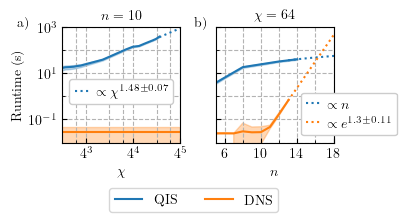

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True, gridspec_kw={'wspace': 0.3})

# PLOT LEFT: n=10 runtime vs. chi
chi_fit = np.arange(555, 1024)
ax[0].plot(chi_list_QIS_GPU, runtime_QIS_chi_GPU, ls='-', marker='', label='QIS', c=colors[0])
ax[0].fill_between(chi_list_QIS_GPU, fill_lower_QIS_chi_GPU, fill_higher_QIS_chi_GPU, alpha=0.3, color=colors[0])
ax[0].plot([0, 1024], [runtime_DNS_n_GPU[5]]*2, ls='-', marker='', label='DNS', c=colors[1])
ax[0].fill_between([0, 1024], [fill_lower_DNS_n_GPU[5]]*2, [fill_higher_DNS_n_GPU[5]]*2, alpha=0.3, color=colors[1])
label_chi_QIS = "$\propto\chi^{"+f"{np.round(C_chi_QIS, 2)}\pm{np.round(std_C_chi_QIS, 2)}"+"}$"
ax[0].plot(chi_fit,  poly(chi_fit, A_chi_QIS, B_chi_QIS, C_chi_QIS), ls='dotted', marker='', c=colors[0], label=label_chi_QIS)
# ax[0].plot(chi_list_QIS[:-1], np.array(len(chi_list_QIS[:-1])*[mem_DNS_chi])*1e-3, ls='-', marker='', label='DNS')
ax[0].set_title(r'$n=10$', fontsize=10)
ax[0].set_xscale('log', base=4)
ax[0].set_yscale('log')
ax[0].set_xlim([32, 1024])
# ax[0].set_xticks([30, 100, 500])
# ax[0].set_xticklabels([30, 100, 500])
# ax[0].set_xticks([50, 100, 200, 250, 350, 400], minor=True)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(-0.15, 0.9, "a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[0].tick_params(which='both', direction="in")
ax[0].set_xlabel(r"$\chi$")
ax[0].set_ylabel("Runtime (s)")
ax[0].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[0].yaxis.grid(True, which="both", ls="--", c='0.7')

# PLOT RIGHT: chi=64 runtime vs. n
n_fit = np.arange(13, 21)
ax[1].plot(n_list_QIS_GPU, runtime_QIS_n_GPU, ls='-', marker='', c=colors[0])
ax[1].fill_between(n_list_QIS_GPU, fill_lower_QIS_n_GPU, fill_higher_QIS_n_GPU, alpha=0.3, color=colors[0])
ax[1].plot(n_list_DNS_GPU[:-1], runtime_DNS_n_GPU[:-1], ls='-', marker='', c=colors[1])
ax[1].fill_between(n_list_DNS_GPU[:-1], fill_lower_DNS_n_GPU[:-1], fill_higher_DNS_n_GPU[:-1], alpha=0.3, color=colors[1])
label_n_QIS = f"$\propto ({np.round(B_n_QIS, 2)}\pm{np.round(std_B_n_QIS, 2)})n$"
label_n_QIS = f"$\propto n$"
ax[1].plot(n_fit, linear(n_fit, A_n_QIS, B_n_QIS), ls='dotted', c=colors[0], label=label_n_QIS)
label_n_DNS = "$\propto e^{"+f"{np.round(B_n_DNS, 2)}\pm{np.round(std_B_n_DNS, 2)}"+"}$"
ax[1].plot(n_fit, exponential(n_fit, A_n_DNS, B_n_DNS), ls='dotted', c=colors[1], label=label_n_DNS)
# ax[1].plot(n_list_DNS, np.array(mem_DNS_n)*1e-3, ls='-', marker='')
ax[1].set_title(r'$\chi=64$', fontsize=10)
ax[1].set_yscale('log')
ax[1].set_xlim([5, 18])
ax[1].set_xticks([8, 12, 16], minor=True)
ax[1].set_xticks([6, 10, 14, 18])
# ax[1].set_ylabel("Runtime (s)")
ax[1].set_xlabel(r"$n$")
# ax[1].set_ylim([0, 40])
# ax[1].set_yticks([0, 20, 40])
# ax[1].set_xticks([5, 15, 25], minor=True)
ax[1].set_ylim([1e-2, 1e3])
ax[1].set_yticks([1e-1, 1e1, 1e3])
ax[1].set_yticks([1e-2, 1e0, 1e2], minor=True, labels=[""]*3)
# ax[0].set_yticklabels([10, 100, 500])
ax[1].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[1].yaxis.grid(True, which="both", ls="--", c='0.7')

trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.05, 0.9, "b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[1].tick_params(which='both', direction="in")

fig.legend(ax[0].get_legend_handles_labels()[0][2:], ax[0].get_legend_handles_labels()[1][2:], loc='center left', bbox_to_anchor=(0.125, 0.45), columnspacing=0.5, handlelength=1, handletextpad=0.5, framealpha=1)
fig.legend(ax[1].get_legend_handles_labels()[0], ax[1].get_legend_handles_labels()[1], loc='center right', bbox_to_anchor=(1.1, 0.3), columnspacing=0.5, handlelength=1, handletextpad=0.5, framealpha=1)
fig.legend(ax[0].get_legend_handles_labels()[0][:-1], ax[0].get_legend_handles_labels()[1][:-1], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fancybox=True)
fig.tight_layout()
plt.savefig(f"runtime_scaling.pdf", bbox_inches="tight")

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_11982/4071893824.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


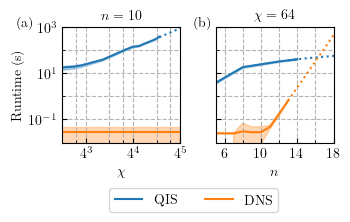

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True, gridspec_kw={'wspace': 0.3})

# PLOT LEFT: n=10 runtime vs. chi
chi_fit = np.arange(555, 1024)
ax[0].plot(chi_list_QIS_GPU, runtime_QIS_chi_GPU, ls='-', marker='', label='QIS', c=colors[0])
ax[0].plot(chi_fit,  poly(chi_fit, A_chi_QIS, B_chi_QIS, C_chi_QIS), ls='dotted', marker='', c=colors[0])
ax[0].fill_between(chi_list_QIS_GPU, fill_lower_QIS_chi_GPU, fill_higher_QIS_chi_GPU, alpha=0.3, color=colors[0])
ax[0].plot([0, 1024], [runtime_DNS_n_GPU[5]]*2, ls='-', marker='', label='DNS', c=colors[1])
ax[0].fill_between([0, 1024], [fill_lower_DNS_n_GPU[5]]*2, [fill_higher_DNS_n_GPU[5]]*2, alpha=0.3, color=colors[1])
# ax[0].plot(chi_list_QIS[:-1], np.array(len(chi_list_QIS[:-1])*[mem_DNS_chi])*1e-3, ls='-', marker='', label='DNS')
ax[0].set_title(r'$n=10$', fontsize=10)
ax[0].set_xscale('log', base=4)
ax[0].set_yscale('log')
ax[0].set_xlim([32, 1024])
# ax[0].set_xticks([30, 100, 500])
# ax[0].set_xticklabels([30, 100, 500])
# ax[0].set_xticks([50, 100, 200, 250, 350, 400], minor=True)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(-0.15, 0.9, "(a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[0].tick_params(which='both', direction="in")
ax[0].set_xlabel(r"$\chi$")
ax[0].set_ylabel("Runtime (s)")
ax[0].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[0].yaxis.grid(True, which="both", ls="--", c='0.7')

# PLOT RIGHT: chi=64 runtime vs. n
n_fit = np.arange(13, 21)
ax[1].plot(n_list_QIS_GPU, runtime_QIS_n_GPU, ls='-', marker='', c=colors[0])
ax[1].fill_between(n_list_QIS_GPU, fill_lower_QIS_n_GPU, fill_higher_QIS_n_GPU, alpha=0.3, color=colors[0])
ax[1].plot(n_fit, linear(n_fit, A_n_QIS, B_n_QIS), ls='dotted', c=colors[0])
ax[1].plot(n_list_DNS_GPU[:-1], runtime_DNS_n_GPU[:-1], ls='-', marker='', c=colors[1])
ax[1].fill_between(n_list_DNS_GPU[:-1], fill_lower_DNS_n_GPU[:-1], fill_higher_DNS_n_GPU[:-1], alpha=0.3, color=colors[1])
ax[1].plot(n_fit, exponential(n_fit, A_n_DNS, B_n_DNS), ls='dotted', c=colors[1])
# ax[1].plot(n_list_DNS, np.array(mem_DNS_n)*1e-3, ls='-', marker='')
ax[1].set_title(r'$\chi=64$', fontsize=10)
ax[1].set_yscale('log')
ax[1].set_xlim([5, 18])
ax[1].set_xticks([8, 12, 16], minor=True)
ax[1].set_xticks([6, 10, 14, 18])
# ax[1].set_ylabel("Runtime (s)")
ax[1].set_xlabel(r"$n$")
# ax[1].set_ylim([0, 40])
# ax[1].set_yticks([0, 20, 40])
# ax[1].set_xticks([5, 15, 25], minor=True)
ax[1].set_ylim([1e-2, 1e3])
ax[1].set_yticks([1e-1, 1e1, 1e3])
ax[1].set_yticks([1e-2, 1e0, 1e2], minor=True, labels=[""]*3)
# ax[0].set_yticklabels([10, 100, 500])
ax[1].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[1].yaxis.grid(True, which="both", ls="--", c='0.7')

trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.05, 0.9, "(b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[1].tick_params(which='both', direction="in")

fig.legend(*ax[0].get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fancybox=True)
fig.tight_layout()
plt.savefig(f"runtime_scaling.pdf", bbox_inches="tight")

# Runtime Comparison between GPU and CPU

In [13]:
# DNS n sweep on CPU
data_DNS_n_sweep_CPU = load_DNS_data("data/DNS_CPU")
n_list_DNS_CPU = data_DNS_n_sweep_CPU[0]
runtime_DNS_n_CPU = data_DNS_n_sweep_CPU[1]

In [14]:
# QIS n sweep on CPU
data_QIS_n_sweep_CPU = load_QIS_data("data/QIS_CPU", x="n")
n_list_QIS_CPU = data_QIS_n_sweep_CPU[0]
runtime_QIS_n_CPU = data_QIS_n_sweep_CPU[1]

In [15]:
# QIS n sweep on GPU
data_QIS_n_sweep_GPU = load_QIS_data("data/QIS_GPU", x="n")
n_list_QIS_GPU = data_QIS_n_sweep_GPU[0]
runtime_QIS_n_GPU = data_QIS_n_sweep_GPU[1]

In [16]:
n_list_QIS_GPU = n_list_QIS_GPU[6:-2]
runtime_QIS_n_GPU = runtime_QIS_n_GPU[6:-2]

In [17]:
# select data
n_list_DNS_CPU = n_list_DNS_CPU[5:]
runtime_DNS_n_CPU = runtime_DNS_n_CPU[5:]
n_list_DNS_CPU += [n_list_DNS_CPU[-1]]
runtime_DNS_n_CPU += [runtime_DNS_n_CPU[-1]]

n_list_DNS_GPU = n_list_DNS_GPU[5:-1]
runtime_DNS_n_GPU = runtime_DNS_n_GPU[5:-1]
n_list_DNS_GPU += [n_list_DNS_GPU[-1]]
runtime_DNS_n_GPU += [runtime_DNS_n_GPU[-1]]

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_11982/3333666400.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


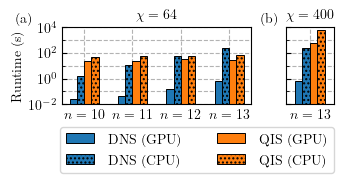

In [18]:
x_labels = ("$n=10$", "$n=11$", "$n=12$", "$n=13$") 
means = {
    'DNS (GPU)': runtime_DNS_n_GPU,
    'DNS (CPU)': runtime_DNS_n_CPU,
    'QIS (GPU)': runtime_QIS_n_GPU,
    'QIS (CPU)': runtime_QIS_n_CPU
}

x = np.arange(len(x_labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(1, 2, figsize=(3.5, 1), gridspec_kw={'wspace': 0.3, 'hspace': 0, 'width_ratios': [4, 1]}, sharey=True)

ax[0].bar(x - 0.5*width, means['DNS (GPU)'][:-1], width, label='DNS (GPU)', hatch="", color=colors[0], edgecolor='black', linewidth=0.7)
ax[0].bar(x + 0.5*width, means['DNS (CPU)'][:-1], width, label='DNS (CPU)', hatch="....", color=colors[0], edgecolor='black', linewidth=0.7)
ax[0].bar(x + 1.5*width, means['QIS (GPU)'][:-1], width, label='QIS (GPU)', hatch="", color=colors[1], edgecolor='black', linewidth=0.7)
ax[0].bar(x + 2.5*width, means['QIS (CPU)'][:-1], width, label='QIS (CPU)', hatch="....", color=colors[1], edgecolor='black', linewidth=0.7)

ax[1].bar(np.array([0]) - 1.5*width, means['DNS (GPU)'][-1], width, label='DNS (GPU)', hatch="", color=colors[0], edgecolor='black', linewidth=0.7)
ax[1].bar(np.array([0]) - 0.5*width, means['DNS (CPU)'][-1], width, label='DNS (CPU)', hatch="....", color=colors[0], edgecolor='black', linewidth=0.7)
ax[1].bar(np.array([0]) + 0.5*width, means['QIS (GPU)'][-1], width, label='QIS (GPU)', hatch="", color=colors[1], edgecolor='black', linewidth=0.7)
ax[1].bar(np.array([0]) + 1.5*width, means['QIS (CPU)'][-1], width, label='QIS (CPU)', hatch="....", color=colors[1], edgecolor='black', linewidth=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel(r'Runtime (s)')
ax[0].set_xticks(x + width, x_labels)
ax[0].set_ylim(1e-2, 1e4)
ax[0].tick_params(which='both', direction="in")
ax[0].set_yscale('log')
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[0].yaxis.grid(True, which="both", ls="--", c='0.7')
ax[0].set_xlim([-2*width, 3+4*width])
ax[1].tick_params(which='both', direction="in")
ax[1].set_yscale('log')
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1].yaxis.grid(True, which="both", ls="--", c='0.7')
ax[1].set_xticks([0], ["$n=13$"])
ax[1].set_title("$\chi=400$", fontsize=10)
ax[0].set_title("$\chi=64$", fontsize=10)
ax[1].set_xlim([-3*width-0.02, 3*width+0.02])
ax[0].set_yticks([1e-2, 1e0, 1e2, 1e4], minor=False)
ax[0].set_yticks([1e-1, 1e1, 1e3], minor=True, labels=[""]*3)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(-0.1, 0.9, "(a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.05, 0.9, "(b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
fig.legend(*ax[0].get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.51, -0.05), ncol=2, fancybox=True, handlelength=2, columnspacing=2.5, handletextpad=1)
fig.tight_layout()
plt.savefig(f"cpu_gpu_runtime.pdf", bbox_inches="tight")
plt.show()